In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [3]:
data_fraude = pd.read_csv('Fraud_Data.csv')
ip_country = pd.read_csv('IpAddress_to_Country.csv')

In [4]:
data_fraude.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [5]:
ip_country.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [6]:
print(data_fraude.shape)
print(ip_country.shape)

(151112, 11)
(138846, 3)


In [7]:
data_fraude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [8]:
data_fraude.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


#  Data Viz

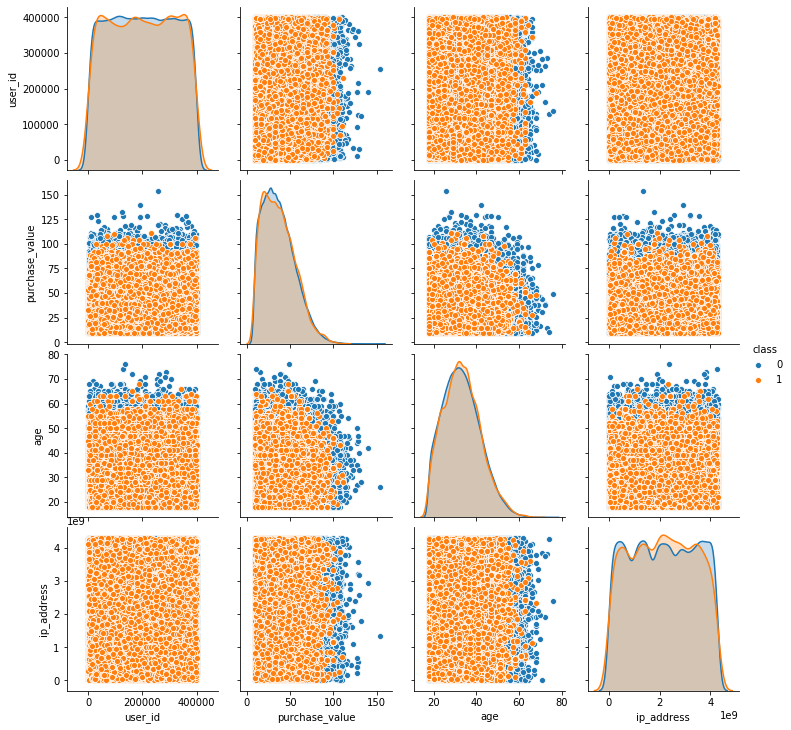

In [9]:
sns.pairplot(data_fraude, hue = 'class')

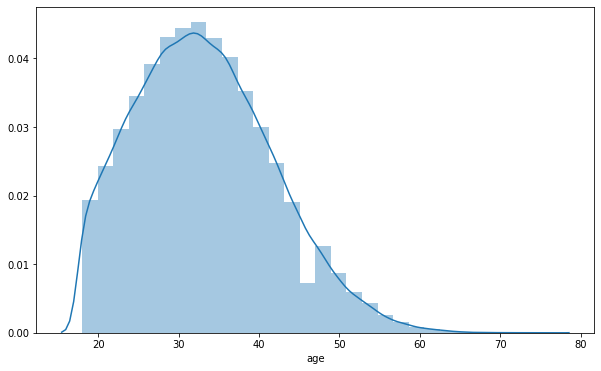

In [10]:
plt.figure(figsize=(10,6))
sns.distplot(data_fraude['age'], kde=True, bins = 30)

0    136961
1     14151
Name: class, dtype: int64


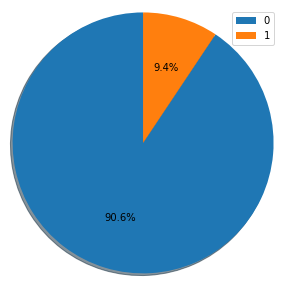

In [11]:
claf= data_fraude['class'].value_counts()
print(claf)
plt.figure(figsize = (6, 5))
plt.pie(claf, autopct='%1.1f%%', shadow=True, startangle=90, radius=1.2)
plt.legend(claf.index)

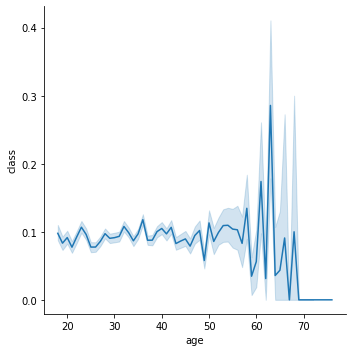

In [12]:
sns.relplot(x="age", y='class', kind='line', data=data_fraude)

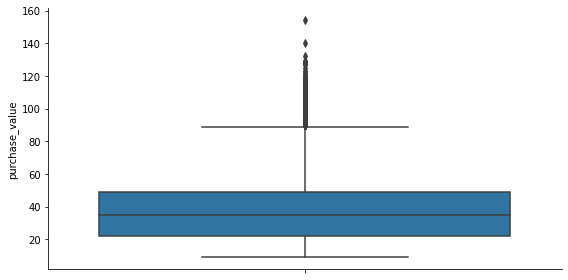

In [13]:
sns.catplot( y='purchase_value', data=data_fraude, kind='box',height=4,aspect=2)
plt.show()

# Data Clean

In [14]:
data_fraude.shape

(151112, 11)

In [15]:
data_fraude = data_fraude.loc[data_fraude['purchase_value']<=150,:]

In [16]:
print(data_fraude.shape)

(151111, 11)


In [17]:
ip_country['ip_c'] = ip_country["upper_bound_ip_address"] - ip_country["lower_bound_ip_address"]

In [18]:
def ip_to_country(ip=None):
    try :
        return ip_country.ip_c[(ip_country.lower_bound_ip_address <= ip) 
                             & (ip_country.upper_bound_ip_address >= ip)].iloc[0]
    except IndexError :
        return 0     
# To affect a country to each IP :
data_fraude["ip_C"] = data_fraude.ip_address.apply(ip_to_country)

C:\Users\ravy_\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
data_fraude.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_C
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,4194303.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,16777215.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,65535.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,0.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,131071.0


In [20]:
data_fraude['signup_time'] = pd.to_datetime(data_fraude.signup_time)
data_fraude['purchase_time'] = pd.to_datetime(data_fraude.purchase_time)

C:\Users\ravy_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ravy_\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
data_fraude['betw_s_p'] = pd.to_numeric(data_fraude['signup_time']) - pd.to_numeric(data_fraude['purchase_time'])

data_fraude['j_sign'] = data_fraude.signup_time.dt.dayofyear
data_fraude['jow_sign'] = data_fraude.signup_time.dt.dayofweek

data_fraude['j_purch'] = data_fraude.purchase_time.dt.dayofyear
data_fraude['jow_purch'] = data_fraude.purchase_time.dt.dayofweek

C:\Users\ravy_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ravy_\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ravy_\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [22]:
data_fraude.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_C,betw_s_p,j_sign,jow_sign,j_purch,jow_purch
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,4194303.0,-4506682000000000,55,1,108,5
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,16777215.0,-17944000000000,158,6,159,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,65535.0,-1000000000,1,3,1,3
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,0.0,-492085000000000,118,1,124,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,131071.0,-4361461000000000,202,1,252,2


In [23]:
data_fraude.shape

(151111, 17)

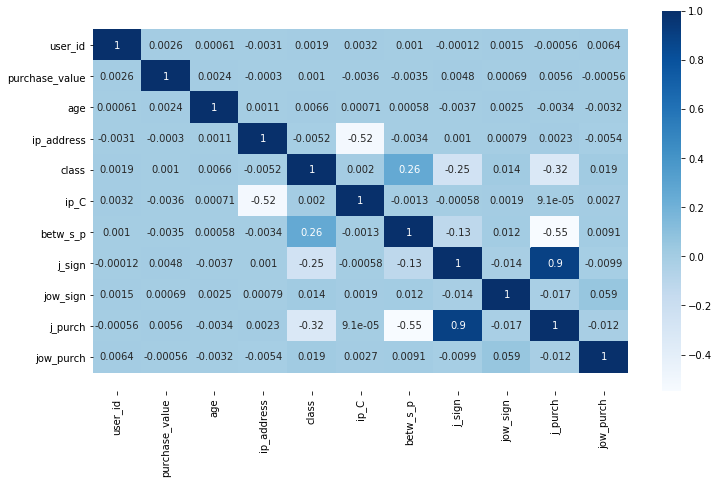

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
data_corr = data_fraude.corr()
ax = sns.heatmap(data_corr, annot=True, cmap='Blues') 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.show()

In [25]:
data = data_fraude.drop(["device_id","purchase_time",'signup_time',"purchase_value","user_id"], axis = 1)

In [26]:
data.head()

,source,browser,sex,age,ip_address,class,ip_C,betw_s_p,j_sign,jow_sign,j_purch,jow_purch
0,SEO,Chrome,M,39,7.327584e+08,0,4194303.0,-4506682000000000,55,1,108,5
1,Ads,Chrome,F,53,3.503114e+08,0,16777215.0,-17944000000000,158,6,159,0
2,SEO,Opera,M,53,2.621474e+09,1,65535.0,-1000000000,1,3,1,3
3,SEO,Safari,M,41,3.840542e+09,0,0.0,-492085000000000,118,1,124,0
4,Ads,Safari,M,45,4.155831e+08,0,131071.0,-4361461000000000,202,1,252,2


In [27]:
data.describe()

,age,ip_address,class,ip_C,betw_s_p,j_sign,jow_sign,j_purch,jow_purch
count,151111.000000,1.511110e+05,151111.000000,1.511110e+05,1.511110e+05,151111.000000,151111.000000,151111.000000,151111.000000
mean,33.140751,2.152151e+09,0.093646,3.158600e+06,-4.932055e+15,109.539954,3.027285,166.622622,3.011806
std,8.617742,1.248499e+09,0.291337,5.813022e+06,3.126258e+15,68.642029,2.006964,81.511056,2.006203
min,18.000000,5.209350e+04,0.000000,0.000000e+00,-1.036797e+16,1.000000,0.000000,1.000000,0.000000
25%,27.000000,1.085929e+09,0.000000,6.553500e+04,-7.644526e+15,49.000000,1.000000,108.000000,1.000000
50%,33.000000,2.154785e+09,0.000000,2.621430e+05,-4.926348e+15,109.000000,3.000000,169.000000,3.000000
75%,39.000000,3.243260e+09,0.000000,2.097151e+06,-2.186773e+15,169.000000,5.000000,229.000000,5.000000
max,76.000000,4.294850e+09,1.000000,1.677722e+07,-1.000000e+09,230.000000,6.000000,350.000000,6.000000


# Preprocessing

In [28]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ["ip_address","j_sign","j_purch","ip_C","age","sex","browser","jow_sign","jow_purch","betw_s_p"]

X = data.loc[:,features_list]
Y = data.loc[:,'class']

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    0
1    0
2    1
3    0
4    0
Name: class, dtype: int64

X :
     ip_address  j_sign  j_purch        ip_C  age sex browser  jow_sign  \
0  7.327584e+08      55      108   4194303.0   39   M  Chrome         1   
1  3.503114e+08     158      159  16777215.0   53   F  Chrome         6   
2  2.621474e+09       1        1     65535.0   53   M   Opera         3   
3  3.840542e+09     118      124         0.0   41   M  Safari         1   
4  4.155831e+08     202      252    131071.0   45   M  Safari         1   

   jow_purch          betw_s_p  
0          5 -4506682000000000  
1          0   -17944000000000  
2          3       -1000000000  
3          0  -492085000000000  
4          2 -4361461000000000  


In [29]:
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
  if ('float' in str(t)) or ('int' in str(t)) :
    numeric_features.append(i)
    numeric_indices.append(idx)
  else :
    categorical_features.append(i)
    categorical_indices.append(idx)

  idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['ip_address', 'j_sign', 'j_purch', 'ip_C', 'age', 'jow_sign', 'jow_purch', 'betw_s_p']  at positions  [0, 1, 2, 3, 4, 7, 8, 9]
Found categorical features  ['sex', 'browser']  at positions  [5, 6]


In [30]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=27, stratify=Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [31]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.tolist()
Y_test = Y_test.tolist()
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[[1484561252.9509802 214 279 524287.0 38 'F' 'FireFox' 6 1
  -5669572000000000]
 [1644404689.38969 15 48 1048575.0 27 'M' 'IE' 3 1 -2880874000000000]
 [3039999471.54715 60 66 524287.0 32 'M' 'Chrome' 6 5 -530846000000000]
 [555174218.327007 192 284 16777215.0 29 'M' 'Chrome' 5 6
  -7951786000000000]
 [3588215991.4509997 63 182 65535.0 37 'M' 'IE' 2 2 -10312169000000000]]
[[3560498324.91173 94 167 8191.0 37 'M' 'Chrome' 5 1 -6279297000000000]
 [3630388631.28743 183 268 8191.0 27 'M' 'Chrome' 3 4 -7377142000000000]]

[0, 0, 0, 0, 0]
[0, 0]


# Train

In [32]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_train[0:5,:])

# Normalization
numeric_transformer = StandardScaler()

# OHE / dummyfication
categorical_transformer = OneHotEncoder(drop='first')#handle_unknown='ignore'

featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices)
        ]
    )

X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...

[[1484561252.9509802 214 279 524287.0 38 'F' 'FireFox' 6 1
  -5669572000000000]
 [1644404689.38969 15 48 1048575.0 27 'M' 'IE' 3 1 -2880874000000000]
 [3039999471.54715 60 66 524287.0 32 'M' 'Chrome' 6 5 -530846000000000]
 [555174218.327007 192 284 16777215.0 29 'M' 'Chrome' 5 6
  -7951786000000000]
 [3588215991.4509997 63 182 65535.0 37 'M' 'IE' 2 2 -10312169000000000]]
...Done
[[ 0.          1.          0.          0.          0.         -0.53308823
   1.5220616   1.38080387 -0.4532111   0.5624705   1.47796277 -1.00380444
  -0.23651796]
 [ 1.          0.          1.          0.          0.         -0.40510895
  -1.37730211 -1.45689281 -0.36304307 -0.71291993 -0.01528809 -1.00380444
   0.65589818]
 [ 1.          0.          0.          0.          0.          0.7122795
  -0.7216671  -1.23577359 -0.4532111  -0.13319701  1.47796277  0.99004076
   1.40793476]
 [ 1.          0.          0.          0.          0.      

In [57]:
# Encoding labels
print("Encoding labels...")
print(Y_train)
print()
labelencoder = LabelEncoder()
Y_train = labelencoder.fit_transform(Y_train)
print("...Done.")
print(Y_train)
print()

Encoding labels...
[0 0 0 ... 0 0 0]

...Done.
[0 0 0 ... 0 0 0]



In [34]:
# Train model
print("Train model...")
rf_classifier = RandomForestClassifier(n_estimators=75)
%time rf_classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
Wall time: 2min 3s
...Done.


In [35]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = rf_classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



# Test

In [36]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_test[0:5,:])

X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...

[[3560498324.91173 94 167 8191.0 37 'M' 'Chrome' 5 1 -6279297000000000]
 [3630388631.28743 183 268 8191.0 27 'M' 'Chrome' 3 4 -7377142000000000]
 [536569485.113946 128 159 2097151.0 29 'M' 'IE' 4 0 -2695021000000000]
 [244541604.2579 162 175 1048575.0 33 'M' 'IE' 3 2 -1111705000000000]
 [3197076989.91935 200 258 16383.0 26 'F' 'Chrome' 6 1 -4954416000000000]]
...Done
[[ 1.          0.          0.          0.          0.          1.12901896
  -0.22629843  0.00495093 -0.54197025  0.44652591  0.98021248 -1.00380444
  -0.43163713]
 [ 1.          0.          0.          0.          0.          1.18497691
   1.07040193  1.24567545 -0.54197025 -0.71291993 -0.01528809  0.49157946
  -0.78296044]
 [ 1.          0.          1.          0.          0.         -1.29210157
   0.26907025 -0.09332428 -0.18270701 -0.48103076  0.4824622  -1.50226575
   0.71537332]
 [ 1.          0.          1.          0.          0.         -1.52591

In [56]:
# Encoding labels
print("Encoding labels...")
print(Y_test)
print()

Y_test = labelencoder.transform(Y_test)
print("...Done.")
print(Y_test)
print()

Encoding labels...
[0 0 0 ... 0 0 0]

...Done.
[0 0 0 ... 0 0 0]



In [38]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = rf_classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



# Performance 1
### Random Forest

In [39]:
print("f1_score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1_score on test set : ", f1_score(Y_test, Y_test_pred))

f1_score on train set :  0.9988061021445943
f1_score on test set :  0.7083238312428735


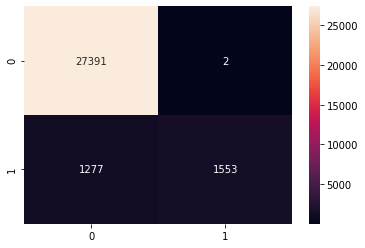

In [40]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(cm, annot=True, fmt="d")

---
### GridsearchCv Random Forest

In [41]:
from sklearn.model_selection import GridSearchCV
rf_classifier_grid = RandomForestClassifier()
          
params = { 
    'n_estimators': [100],
    #'max_features': ['auto'],
    'max_depth' : [10],
    "min_samples_split": [2],
    'criterion' :['gini', 'entropy']
}
        
%time classifierG = GridSearchCV(cv=5, estimator = rf_classifier_grid, param_grid = params).fit(X_train, Y_train)

Wall time: 7min 19s


In [42]:
Y_train_predG = classifierG.predict(X_train)

In [43]:
Y_test_predG = classifierG.predict(X_test)

# Performance 2

In [44]:
print("f1_score2 on train set : ", f1_score(Y_train, Y_train_predG))
print("f1_score2 on test set : ", f1_score(Y_test, Y_test_predG))

f1_score2 on train set :  0.6965632375798745
f1_score2 on test set :  0.7086470454026922


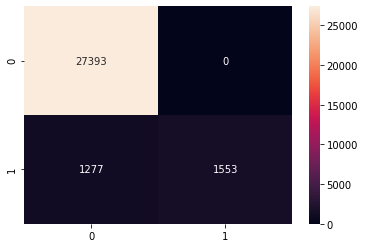

In [45]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_test_predG)
sns.heatmap(cm, annot=True, fmt="d")

---
---
---
### Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

print("Train model...")
classifierGB = GradientBoostingClassifier(learning_rate=0.5,n_estimators=75)
%time classifierGB.fit(X_train, Y_train)
print("...Done.")

Train model...
Wall time: 54.8 s
...Done.


In [47]:
Y_train_predGB = classifierGB.predict(X_train)

In [48]:
Y_test_predGB = classifierGB.predict(X_test)

# Performance 3

In [49]:
print("f1_score3 on train set : ", f1_score(Y_train, Y_train_predGB))
print("f1_score4 on test set : ", f1_score(Y_test, Y_test_predGB))

f1_score3 on train set :  0.7069693167560169
f1_score4 on test set :  0.7026904815735927


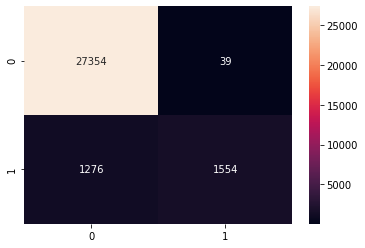

In [50]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_test_predGB)
sns.heatmap(cm, annot=True, fmt="d")

---
### Gridsearchcv Gradient Boosting

In [51]:
from sklearn.model_selection import GridSearchCV
# classifierGB = GradientBoostingClassifier(learning_rate=0.5,n_estimators=75)
GB_classifier_grid = GradientBoostingClassifier()
          

    
params = { 
    'n_estimators': [100],
    'learning_rate': [0.1],
    'min_samples_leaf': [50],
    'subsample': [0.8],
    'subsample': [0.8],
    'max_depth' : [10],
    #max_features='sqrt',
    #'max_features': ['auto'],
    }
        
%time classifierGBG = GridSearchCV(cv=5, estimator = GB_classifier_grid, param_grid = params).fit(X_train, Y_train)

Wall time: 7min 30s


In [52]:
Y_train_predGBG = classifierGBG.predict(X_train)

In [53]:
Y_test_predGBG = classifierGBG.predict(X_test)

# Performance 4

In [54]:
print("f1_score4 on train set : ", f1_score(Y_train, Y_train_predGBG))
print("f1_score4 on test set : ", f1_score(Y_test, Y_test_predGBG))

f1_score4 on train set :  0.696938305709024
f1_score4 on test set :  0.7086470454026922


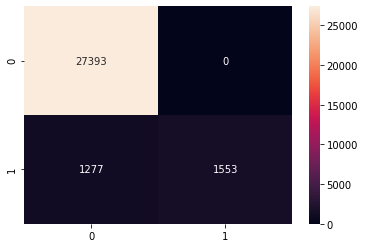

In [55]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_test_predGBG)
sns.heatmap(cm, annot=True, fmt="d")